# CartPole 环境视频录制

这个笔记本演示了如何在无 GUI 环境中运行 CartPole 并保存视频。

In [1]:
# 导入必要的库
import gymnasium as gym
import os

## 创建和配置环境

我们将创建 CartPole 环境并使用 `RecordVideo` 包装器来录制视频。

In [2]:
# 创建视频保存目录
video_dir = "./videos"
os.makedirs(video_dir, exist_ok=True)
print(f"视频将保存在: {os.path.abspath(video_dir)}")

# 创建环境并配置视频录制
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env, 
    video_folder=video_dir,
    episode_trigger=lambda x: True,  # 录制每一个回合
    name_prefix="cartpole-random"
)

视频将保存在: /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos


/root/miniconda3/envs/RL/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


## 运行环境

现在我们运行一个回合，使用随机动作，并记录结果。

In [3]:
# 重置环境
obs, _ = env.reset()
total_reward = 0.0
total_steps = 0

# 运行一个回合，使用随机动作
while True:
    action = env.action_space.sample()
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    if done:
        break

print(f"Episode done in {total_steps} steps, total reward {total_reward:.2f}")
env.close()

Moviepy - Building video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-random-episode-0.mp4.
Moviepy - Writing video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-random-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-random-episode-0.mp4
Episode done in 20 steps, total reward 20.00


## 多回合录制

我们可以运行多个回合并录制它们。

In [4]:
# 创建新的环境用于多回合录制
multi_env = gym.make("CartPole-v1", render_mode="rgb_array")
multi_env = gym.wrappers.RecordVideo(
    multi_env, 
    video_folder=video_dir,
    episode_trigger=lambda x: True,  # 录制每一个回合
    name_prefix="cartpole-multi"
)

num_episodes = 3
results = []

for episode in range(num_episodes):
    obs, _ = multi_env.reset()
    total_reward = 0.0
    total_steps = 0
    
    while True:
        action = multi_env.action_space.sample()
        obs, reward, done, _, _ = multi_env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break
    
    results.append((episode, total_steps, total_reward))
    print(f"Episode {episode+1} done in {total_steps} steps, total reward {total_reward:.2f}")

multi_env.close()

/root/miniconda3/envs/RL/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-0.mp4.
Moviepy - Writing video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-0.mp4
Episode 1 done in 17 steps, total reward 17.00
Moviepy - Building video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-1.mp4.
Moviepy - Writing video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-1.mp4
Episode 2 done in 17 steps, total reward 17.00
Moviepy - Building video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-2.mp4.
Moviepy - Writing video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-multi-episode-2.mp4
Episode 3 done in 9 steps, total reward 9.00


## 结果可视化

我们可以绘制每个回合的步数和奖励。

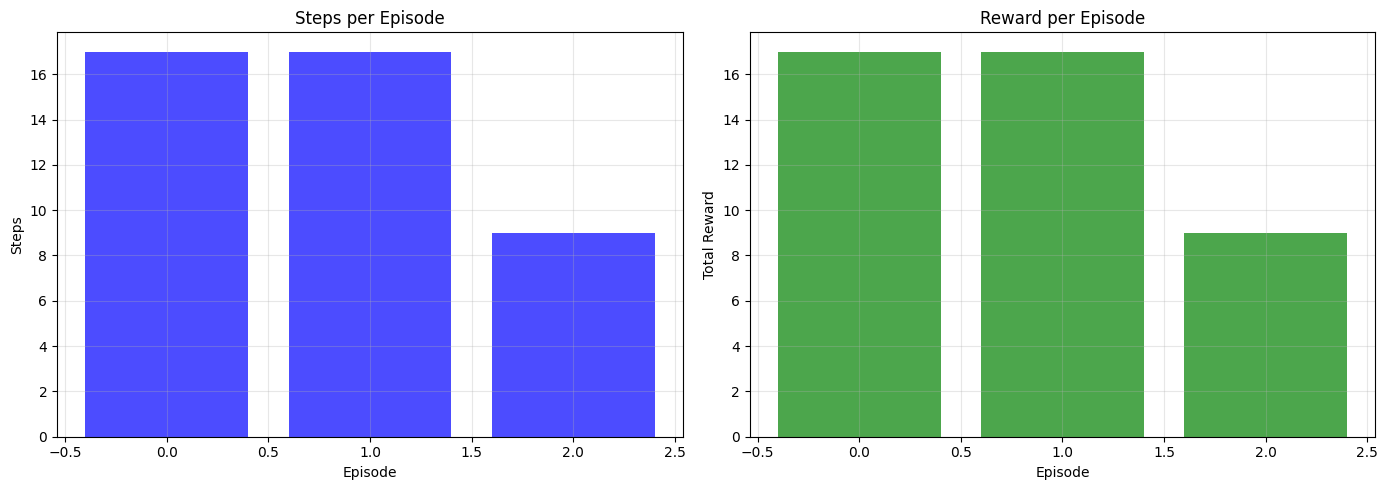

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 提取数据
episodes = [ep for ep, _, _ in results]
steps = [step for _, step, _ in results]
rewards = [reward for _, _, reward in results]

# 创建图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 绘制步数
ax1.bar(episodes, steps, color='blue', alpha=0.7)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Steps')
ax1.set_title('Steps per Episode')
ax1.grid(True, alpha=0.3)

# 绘制奖励
ax2.bar(episodes, rewards, color='green', alpha=0.7)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Total Reward')
ax2.set_title('Reward per Episode')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 检查视频文件

列出生成的视频文件。

In [6]:
# 列出视频目录中的文件
video_files = os.listdir(video_dir)
print(f"生成的视频文件:")
for file in video_files:
    if file.endswith(".mp4"):
        file_path = os.path.join(video_dir, file)
        file_size = os.path.getsize(file_path) / 1024  # KB
        print(f" - {file} ({file_size:.2f} KB)")

生成的视频文件:
 - cartpole-random-episode-0.mp4 (3.89 KB)
 - cartpole-multi-episode-0.mp4 (3.63 KB)
 - cartpole-multi-episode-1.mp4 (3.62 KB)
 - cartpole-multi-episode-2.mp4 (2.98 KB)


# 更长的案例：PID 策略用于控制 cartpole

In [10]:
# 创建新的环境用于多回合录制
multi_env = gym.make("CartPole-v1", render_mode="rgb_array")
multi_env = gym.wrappers.RecordVideo(
    multi_env, 
    video_folder=video_dir,
    episode_trigger=lambda x: True,  # 录制每一个回合
    name_prefix="cartpole-pid"
)

# 实现一个简单的PID控制器
class PIDController:
    def __init__(self, kp=1.0, ki=0.1, kd=0.5):
        self.kp = kp  # 比例项系数
        self.ki = ki  # 积分项系数
        self.kd = kd  # 微分项系数
        self.prev_error = 0
        self.integral = 0
        
    def compute_action(self, obs):
        # 在CartPole中，我们关注的是杆子的角度(obs[2])和角速度(obs[3])
        angle = obs[2]  # 杆子的角度
        angle_velocity = obs[3]  # 杆子的角速度
        
        # 计算PID控制
        error = angle  # 目标是保持杆子直立，所以误差就是当前角度
        self.integral += error
        derivative = error - self.prev_error
        self.prev_error = error
        
        # 计算控制信号
        control = self.kp * error + self.ki * self.integral + self.kd * derivative
        
        # 将控制信号转换为离散动作（向左或向右）
        # 如果控制信号为正，则向右移动小车(action=1)
        # 如果控制信号为负，则向左移动小车(action=0)
        return 1 if control > 0 else 0
    
    def reset(self):
        self.prev_error = 0
        self.integral = 0

# 运行多个回合并记录结果
num_episodes = 3
results = []

# 创建PID控制器
pid_controller = PIDController(kp=0.3, ki=0.01, kd=0.5)

for episode in range(num_episodes):
    obs, _ = multi_env.reset()
    pid_controller.reset()  # 重置PID控制器状态
    total_reward = 0.0
    total_steps = 0
    
    # 设置最大步数，防止无限运行
    max_steps = 500
    
    while total_steps < max_steps:
        # 使用PID控制器计算动作
        action = pid_controller.compute_action(obs)
        
        # 执行动作
        obs, reward, done, _, _ = multi_env.step(action)
        total_reward += reward
        total_steps += 1
        
        if done:
            break
    
    results.append((episode, total_steps, total_reward))
    print(f"Episode {episode+1} done in {total_steps} steps, total reward {total_reward:.2f}")

multi_env.close()

# 打印结果摘要
print("\n结果摘要:")
for ep, steps, reward in results:
    print(f"回合 {ep+1}: 步数 = {steps}, 总奖励 = {reward:.2f}")

Moviepy - Building video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-0.mp4.
Moviepy - Writing video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-0.mp4
Episode 1 done in 356 steps, total reward 356.00
Moviepy - Building video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-1.mp4.
Moviepy - Writing video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-1.mp4
Episode 2 done in 500 steps, total reward 500.00
Moviepy - Building video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-2.mp4.
Moviepy - Writing video /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /mnt/share_disk/tianyubo/Deep-Reinforcement-Learning-Hands-On-Third-Edition/Chapter02/videos/cartpole-pid-episode-2.mp4
Episode 3 done in 100 steps, total reward 100.00

结果摘要:
回合 1: 步数 = 356, 总奖励 = 356.00
回合 2: 步数 = 500, 总奖励 = 500.00
回合 3: 步数 = 100, 总奖励 = 100.00
